In [9]:
from qem.crystal_analyzer import CrystalAnalyzer
import hyperspy.api as hs   
import scipy.io as sio

file = '/home/zzhang/OneDrive/data/Yang Zhang STO/dynamic pc AXON/adf_avg_25.hspy'
s = hs.load(file)
image = s.data
dx =0.071356
matfile_path = '/home/zzhang/OneDrive/data/Yang Zhang STO/dynamic pc AXON/adf_avg_coords.mat'
matfile = sio.loadmat(matfile_path)
coords = matfile['coords'].astype(float)
crystal_analyzer = CrystalAnalyzer(image, dx, coords[:,:2]/dx, coords[:,2].astype(int)-1,['Sr','Ti','O'])

In [10]:
cif_file_path = '/home/zzhang/OneDrive/code/qem/examples/SrTiO3_mp-5229_conventional_standard.cif'
crystal_analyzer.import_crystal_structure(cif_file_path)


In [11]:
crystal_analyzer.min_distances()

{'Sr': {'O': 1.394814087831242, 'Sr': 1.972565, 'Ti': 1.7082914006160512},
 'Ti': {'O': 0.9862825, 'Sr': 1.7082914006160512, 'Ti': 1.972565},
 'O': {'O': 1.394814087831242, 'Sr': 1.394814087831242, 'Ti': 0.9862825}}

In [1]:
from qem.crystal_analyzer import CrystalAnalyzer
import hyperspy.api as hs   
import scipy.io as sio

file = '/home/zzhang/OneDrive/data/Yang Zhang STO/dynamic pc AXON/adf_avg_25.hspy'
s = hs.load(file)
image = s.data
dx =0.071356
matfile_path = '/home/zzhang/OneDrive/data/Yang Zhang STO/dynamic pc AXON/adf_avg_coords.mat'
matfile = sio.loadmat(matfile_path)
coords = matfile['coords'].astype(float)
crystal_analyzer = CrystalAnalyzer(image, dx, coords[:,:2]/dx, coords[:,2].astype(int)-1,['Y','Al','O'])

In [2]:
import numpy as np
cif_file_path = '/home/zzhang/OneDrive/data/Yang Zhang STO/STEM/72104-CaYAlO4-rotated.cif'

crystal_analyzer.import_crystal_structure(cif_file_path)
# crystal_analyzer.transform(np.array([[1,0,0],[0,0,1],[0,1,0]]))


In [10]:
# from pymatgen.core.structure import Structure
# from pymatgen.transformations.advanced_transformations import SupercellTransformation
# structure = Structure.from_file(cif_file_path)
# transformation_matrix =np.array([[1,0,0],[0,0,1],[0,1,0]])
# structure =SupercellTransformation(
#             scaling_matrix=transformation_matrix
#         ).apply_transformation(structure)
# structure.to(filename='/home/zzhang/OneDrive/data/Yang Zhang STO/STEM/72104-CaYAlO4-rotated.cif', fmt='cif')

In [3]:
import numpy as np
crystal_analyzer.origin = np.array([831.26558017, 962.21710935, 0])
crystal_analyzer.a = np.array([ 31.26403339, -36.73158211,0])
crystal_analyzer.b = np.array([-118.32881689, -100.67459688,0])
crystal_analyzer.c = crystal_analyzer.unitcell.cell[2]


array([[755.31741234, 897.60012609,   0.        ,   0.        ],
       [788.88493111, 926.15949573,   0.        ,   0.        ],
       [830.11383748, 929.57163347,   1.82255   ,   0.        ],
       [745.35253936, 857.45640624,   1.82255   ,   0.        ],
       [787.73318842, 893.51401986,   1.82255   ,   1.        ],
       [831.26558017, 962.21710935,   0.        ,   1.        ],
       [772.10117172, 911.87981091,   1.82255   ,   2.        ],
       [787.73318842, 893.51401986,   0.        ,   2.        ],
       [846.89759686, 943.85131829,   0.        ,   2.        ],
       [831.26558017, 962.21710935,   1.82255   ,   2.        ],
       [732.80417164, 878.44577729,   0.        ,   2.        ],
       [811.39817181, 945.31384453,   0.        ,   2.        ],
       [807.60059678, 910.41728467,   1.82255   ,   2.        ],
       [767.86578006, 876.61075504,   1.82255   ,   2.        ]])

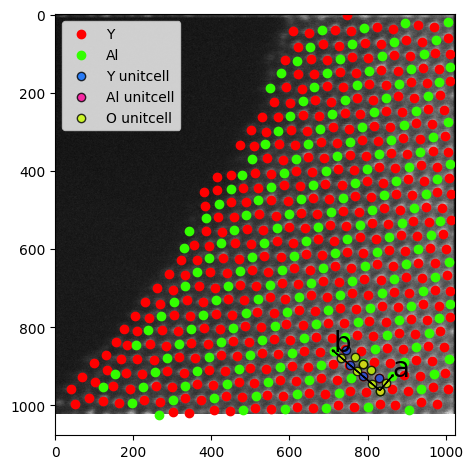

In [4]:
crystal_analyzer.unitcell_mapping()

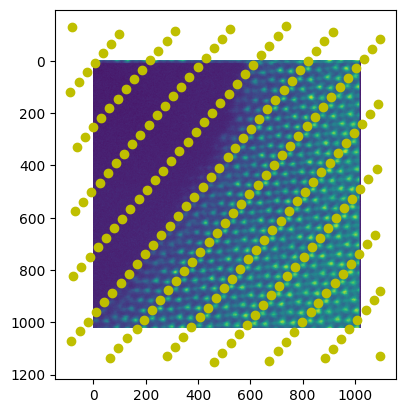

In [5]:
import matplotlib.pyplot as plt
shift_origin_adaptive = crystal_analyzer.shift_origin_adaptive(a_limit=20,b_limit=15)
plt.imshow(crystal_analyzer.image)
for _,shift in shift_origin_adaptive.items():
    plt.scatter(shift[0],shift[1],color='y')

In [7]:
crystal_analyzer.supercell_with_refined_peaks(a_limit=20,b_limit=15)
crystal_analyzer.write_lammps()

In [8]:
crystal_analyzer.generate_supercell_lattice(a_limit=20,b_limit=15)
crystal_analyzer.write_lammps()